In [117]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("results/metadata.csv")

In [119]:
df[(df["original_prob"] < 0.1) & (df["adversarial_bim_prob"] > 0.1)]

,index,record_name,chagas_label,original_prob,adversarial_pbga_prob,adversarial_bim_prob,adversarial_fgsm_prob,pbga_success,bim_success,fgsm_success
0,0,13197,0,0.000651,0.808336,0.763570,0.002599,1,1,0
2,2,395172,0,0.000231,0.805600,0.985139,0.000103,1,1,0
9,9,1372975,0,0.000619,0.344620,0.618479,0.003825,1,1,0
13,13,454087,0,0.000226,0.802102,0.949476,0.001551,1,1,0
14,14,4250565,0,0.000455,0.801963,0.974010,0.000355,1,1,0
17,17,1401709,0,0.000342,0.794013,0.217147,0.004370,1,1,0
26,26,2853030,0,0.000394,0.802047,0.924955,0.235446,1,1,1


In [144]:
df[df["original_prob"] < 0.1]

,index,record_name,chagas_label,original_prob,adversarial_pbga_prob,adversarial_bim_prob,adversarial_fgsm_prob,pbga_success,bim_success,fgsm_success
0,0,13197,0,0.000651,0.808336,0.763570,0.002599,1,1,0
1,1,471835,0,0.000008,0.000021,0.000023,0.000016,0,0,0
2,2,395172,0,0.000231,0.805600,0.985139,0.000103,1,1,0
6,6,1362559,0,0.000165,0.014732,0.076935,0.001464,0,0,0
8,8,193615,0,0.000025,0.001965,0.001833,0.000111,0,0,0
9,9,1372975,0,0.000619,0.344620,0.618479,0.003825,1,1,0
10,10,3058416,0,0.000256,0.002788,0.005977,0.000203,0,0,0
13,13,454087,0,0.000226,0.802102,0.949476,0.001551,1,1,0
14,14,4250565,0,0.000455,0.801963,0.974010,0.000355,1,1,0
17,17,1401709,0,0.000342,0.794013,0.217147,0.004370,1,1,0


In [145]:
idx_pos_to_neg = df[(df["original_prob"] > 0.1) & (df["adversarial_bim_prob"] < 0.1)]["index"]

In [146]:
#ecg_fgsm = np.load("results/adversarial_fgsm_beats.npy", allow_pickle=True)
ecg_fgsm = np.load("results/adversarial_bim_beats.npy", allow_pickle=True)

In [147]:
ecg_original = np.load("results/original_beats.npy", allow_pickle=True)

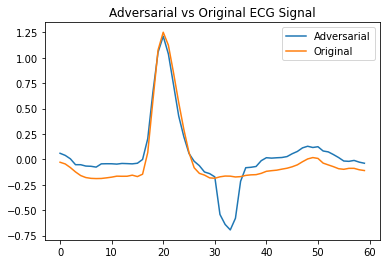

In [148]:
plt.plot(ecg_fgsm[0,:,0])
plt.plot(ecg_original[0,:,0])
plt.title("Adversarial vs Original ECG Signal")
plt.legend(["Adversarial", "Original"])

# Positive to negavtive

In [149]:
mean_beat_fgsm = np.nanmean(ecg_fgsm[idx_pos_to_neg,:,0], axis=0)
std_dev_beat_fgsm = np.nanstd(ecg_fgsm[idx_pos_to_neg,:,0], axis=0)

mean_beat_original = ecg_original[idx_pos_to_neg,:,0].mean(axis=0)
std_dev_beat_original = ecg_original[idx_pos_to_neg,:,0].std(axis=0)

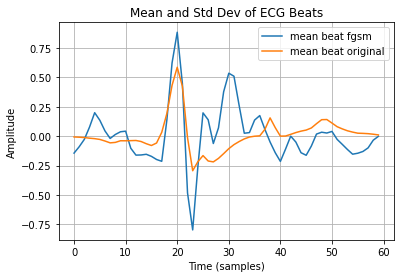

In [150]:
plt.plot(mean_beat_fgsm, label="mean beat fgsm", color="C0")
plt.plot(mean_beat_original, label="mean beat original", color="C1")
plt.legend()
plt.title("Mean and Std Dev of ECG Beats")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

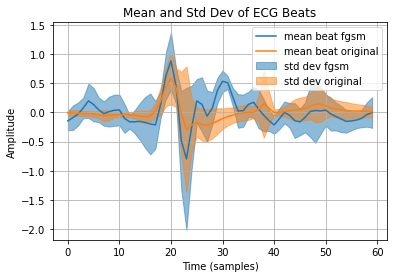

In [151]:
plt.plot(mean_beat_fgsm, label="mean beat fgsm", color="C0")
plt.plot(mean_beat_original, label="mean beat original", color="C1")
plt.fill_between(np.arange(len(mean_beat_fgsm)), mean_beat_fgsm - std_dev_beat_fgsm, mean_beat_fgsm + std_dev_beat_fgsm, alpha=0.5, label="std dev fgsm", color="C0")
plt.fill_between(np.arange(len(mean_beat_original)), mean_beat_original - std_dev_beat_original, mean_beat_original + std_dev_beat_original, alpha=0.5, label="std dev original", color="C1")
plt.legend()
plt.title("Mean and Std Dev of ECG Beats")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [152]:
ecg_diff = abs(ecg_original[idx_pos_to_neg,:,0] - ecg_fgsm[idx_pos_to_neg,:,0])


In [153]:
ecg_diff_mean = ecg_diff.mean(axis=0)

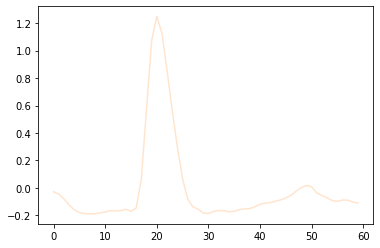

In [154]:
plt.plot(ecg_diff_mean, label="mean beat fgsm", color="C0")
plt.plot(ecg_original[0,:,0], label="mean beat original", color="C1",alpha=0.2)

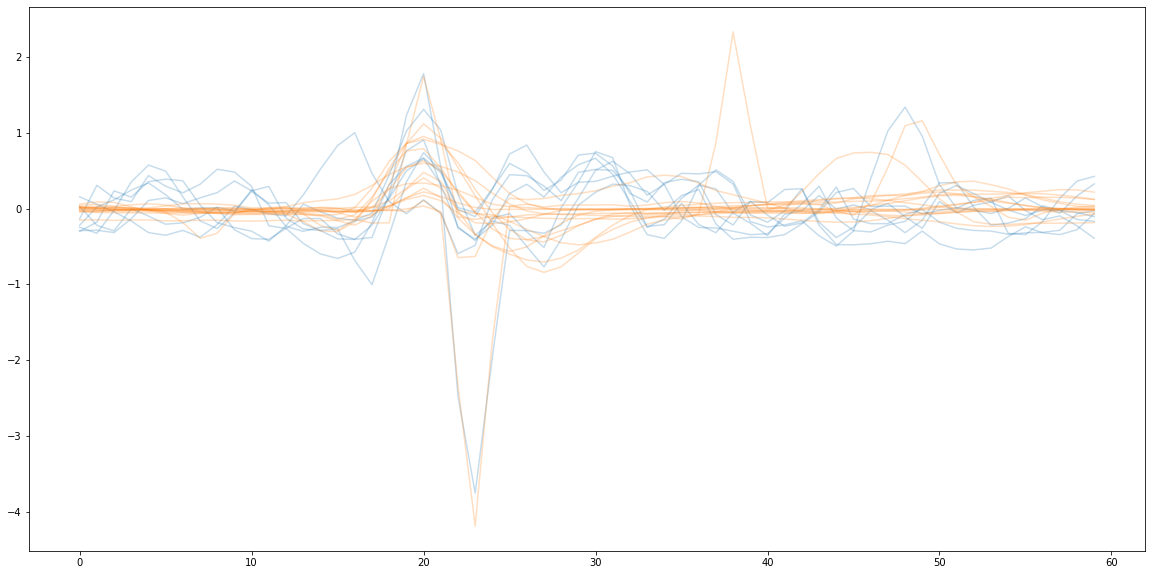

In [155]:
plt.figure(figsize=(20,10))
for i in ecg_fgsm[idx_pos_to_neg,:,0]:
    plt.plot(i, label="fgsm beat", color="C0", alpha=0.25)
for j in ecg_original[idx_pos_to_neg,:,0]:
    plt.plot(j, label="fgsm beat", color="C1", alpha=0.25)

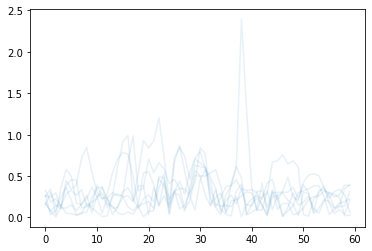

In [156]:
for i in range(len(ecg_fgsm[idx_pos_to_neg,:,0])):
    plt.plot(ecg_diff[i], label="fgsm beat", color="C0", alpha=0.1)

## Nevative to positive

In [134]:
idx_neg_to_pos = df[(df["original_prob"] < 0.1) & (df["adversarial_bim_prob"] > 0.1)]["index"]

In [136]:
mean_beat_fgsm = ecg_fgsm[idx_neg_to_pos,:,0].mean(axis=0)
std_dev_beat_fgsm = ecg_fgsm[idx_neg_to_pos,:,0].std(axis=0)

mean_beat_original = ecg_original[idx_neg_to_pos,:,0].mean(axis=0)
std_dev_beat_original = ecg_original[idx_neg_to_pos,:,0].std(axis=0)

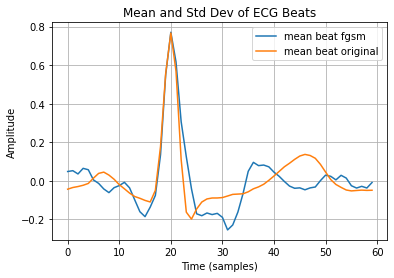

In [137]:
plt.plot(mean_beat_fgsm, label="mean beat fgsm", color="C0")
plt.plot(mean_beat_original, label="mean beat original", color="C1")
plt.legend()
plt.title("Mean and Std Dev of ECG Beats")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

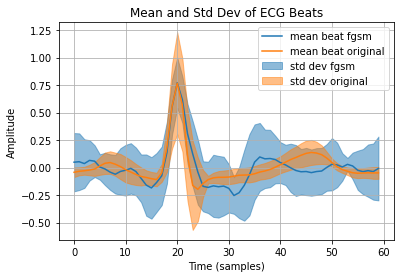

In [138]:
plt.plot(mean_beat_fgsm, label="mean beat fgsm", color="C0")
plt.plot(mean_beat_original, label="mean beat original", color="C1")
plt.fill_between(np.arange(len(mean_beat_fgsm)), mean_beat_fgsm - std_dev_beat_fgsm, mean_beat_fgsm + std_dev_beat_fgsm, alpha=0.5, label="std dev fgsm", color="C0")
plt.fill_between(np.arange(len(mean_beat_original)), mean_beat_original - std_dev_beat_original, mean_beat_original + std_dev_beat_original, alpha=0.5, label="std dev original", color="C1")
plt.legend()
plt.title("Mean and Std Dev of ECG Beats")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [139]:
ecg_diff = abs(ecg_original[idx_neg_to_pos,:,0] - ecg_fgsm[idx_neg_to_pos,:,0])


In [140]:
ecg_diff_mean = ecg_diff.mean(axis=0)

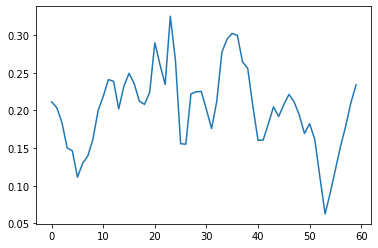

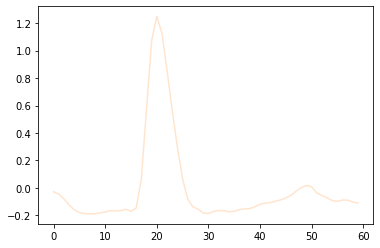

In [141]:
plt.plot(ecg_diff_mean, label="mean beat fgsm", color="C0")
plt.show()
plt.plot(ecg_original[0,:,0], label="mean beat original", color="C1",alpha=0.2)
plt.show()

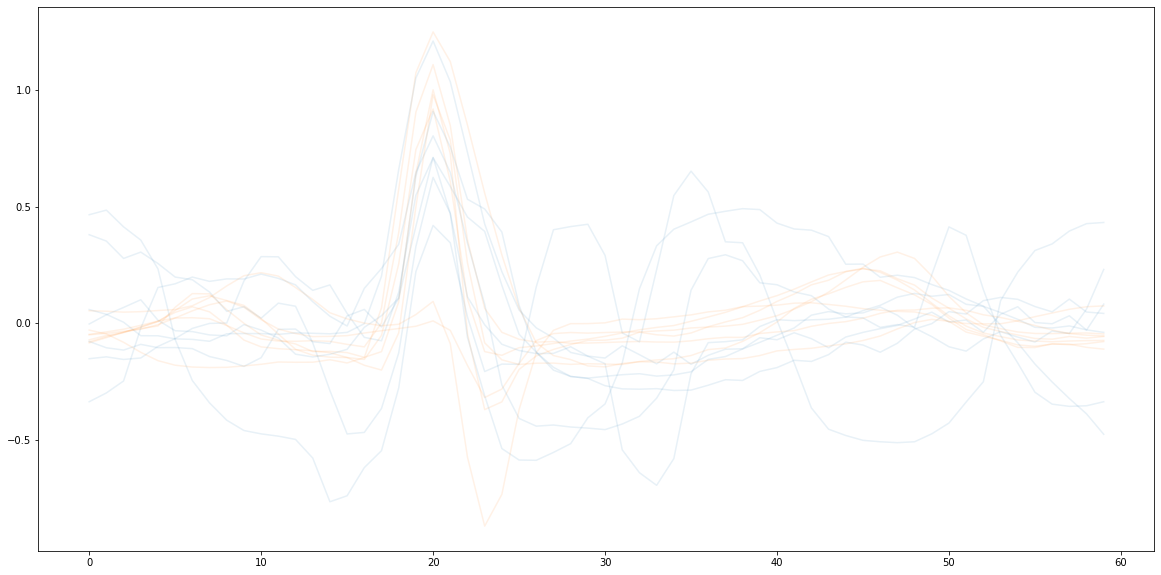

In [142]:
plt.figure(figsize=(20,10))
for i in ecg_fgsm[idx_neg_to_pos,:,0]:
    plt.plot(i, label="fgsm beat", color="C0", alpha=0.1)
for j in ecg_original[idx_neg_to_pos,:,0]:
    plt.plot(j, label="fgsm beat", color="C1", alpha=0.1)